In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Information about environmnet:
# 1. given a 4X6 matrix(0 indexed) 
# 2. start position for each episode is 0,0
# 3. terminal position for each episode is 0,5
# 4. reward of -100 is given for transition which takes the person to first row (except start and terminal position)
# 5. reward for all other transitions is -1



In [15]:
# 0 is left
# 1 is up
# 2 is right
# 3 is down
epsilon=0.1
alpha=0.9
gamma=1
# choose action follows epsilon-greeady
def choose_action(current_row,current_column,q):
    num=np.random.randint(10)
    if(num==0):
        return np.random.randint(4)
    else:
        max_state=-999999999999
        action=-1
        if(q[current_row,current_column,0]>max_state):
            max_state=q[current_row,current_column,0]
            action=0
        if(q[current_row,current_column,1]>max_state):
            max_state=q[current_row,current_column,1]
            action=1
        if(q[current_row,current_column,2]>max_state):
            max_state=q[current_row,current_column,2]
            action=2
        if(q[current_row,current_column,3]>max_state):
            max_state=q[current_row,current_column,3]
            action=3
        return action
def get_state(current_row,current_column,action):
    if(current_row==0 and current_column>=1 and current_column<=4):
        return 0,5
    if(action==0):
        return current_row,max(current_column-1,0)
    elif(action==1):
        return max(current_row-1,0),current_column
    elif(action==2):
        return current_row,min(current_column+1,5)
    elif(action==3):
        return min(current_row+1,3),current_column
def sarsa():
    return_episode=np.zeros([500])
    count_episode=np.zeros([500])
    for j in range(200):
        q=np.zeros([4,6,4])
        for i in range(100):
            r=0
            current_row=0
            current_column=0
            current_action=choose_action(current_row,current_column,q)
            while(current_row!=0 or current_column!=5):
                next_row,next_column=get_state(current_row,current_column,current_action)            
                next_action=choose_action(next_row,next_column,q)
                reward=-1
                if(next_row==0 and next_column>=1 and next_column<=4):
                    reward=-100
                r+=reward
                q[current_row,current_column,current_action]=q[current_row,current_column,current_action]+alpha*(reward+q[next_row,next_column,next_action]-q[current_row,current_column,current_action])
                current_row=next_row
                current_column=next_column
                current_action=next_action
            return_episode[i]=(return_episode[i]*count_episode[i]+r)/(count_episode[i]+1);
            count_episode[i]+=1
    return(return_episode)
        
def qlearning():
    return_episode=np.zeros([500])
    count_episode=np.zeros([500])
    for j in range(200):
        q=np.zeros([4,6,4])
        for i in range(500):
            r=0
            current_row=0
            current_column=0
            while(current_row!=0 or current_column!=5):
    #             print(i)
                action=choose_action(current_row,current_column,q)
                next_row,next_column=get_state(current_row,current_column,action)            
                reward=-1
                if(next_row==0 and next_column>=1 and next_column<=4):
                    reward=-100
                r+=reward
                max_next_state=-999999999999
                if(q[next_row,next_column,0]>max_next_state):
                    max_next_state=q[next_row,next_column,0]
                if(q[next_row,next_column,1]>max_next_state):
                    max_next_state=q[next_row,next_column,1]
                if(q[next_row,next_column,2]>max_next_state):
                    max_next_state=q[next_row,next_column,2]
                if(q[next_row,next_column,3]>max_next_state):
                    max_next_state=q[next_row,next_column,3]
                q[current_row,current_column,action]=q[current_row,current_column,action]+alpha*(reward+max_next_state-q[current_row,current_column,action])
                current_row=next_row
                current_column=next_column
            return_episode[i]=(return_episode[i]*count_episode[i]+r)/(count_episode[i]+1);
            count_episode[i]+=1
    return(return_episode)

In [16]:
sum_rewards_sarsa=sarsa()
sum_rewards_qlearning=qlearning()
print("done")

done


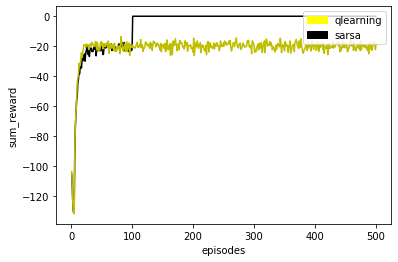

In [17]:
x=list()
s_reward=list()
q_reward=list()

for i in range(500):
    x.append(i+1)
    s_reward.append(sum_rewards_sarsa[i])
    q_reward.append(sum_rewards_qlearning[i])
plt.plot(x,s_reward,'k')
plt.plot(x,q_reward,'y')
yellow_patch = mpatches.Patch(color='yellow', label='qlearning')
black_patch = mpatches.Patch(color='black', label='sarsa')
plt.legend(handles=[yellow_patch,black_patch],loc=1)
plt.xlabel('episodes')
plt.ylabel('sum_reward')

plt.show()